In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pathlib

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix

## Data Preparing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
train_dir = '/content/drive/MyDrive/Dataset baru/train 50'
val_dir = '/content/drive/MyDrive/Dataset baru/val 50'

In [8]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [9]:
train_datagen = ImageDataGenerator(
  preprocessing_function=preprocess_input,
  #rescale = 1/255,
  rotation_range=30,
  brightness_range=[0.5,1.5],
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  width_shift_range=0.2,
  height_shift_range=0.2, 
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, 
                                 #rescale = 1.0/255.
                                 )

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 18588 images belonging to 50 classes.
Found 4764 images belonging to 50 classes.


## Model Building

In [11]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (128, 128, 3), include_top = False, weights = "imagenet")
base_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [12]:
model = tf.keras.Sequential([base_model,
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dropout(0.4),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(50, activation="softmax")                                     
                                ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 20480)             0         
                                                                 
 dropout (Dropout)           (None, 20480)             0         
                                                                 
 dense (Dense)               (None, 512)               10486272  
                                                                 
 dense_1 (Dense)             (None, 50)                25650     
                                                                 
Total params: 12,769,906
Trainable params: 10,511,922
Non-trainable params: 2,257,984
____________________________________

In [14]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)
model.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

result = model.fit(train_generator, steps_per_epoch=train_generator.samples//32, epochs = 32, verbose=1, validation_data=val_generator, validation_steps=val_generator.samples//32)

Epoch 1/32
580/580 [==============================] - 4492s 8s/step - loss: 1.5373 - accuracy: 0.5939 - val_loss: 0.6737 - val_accuracy: 0.7914
Epoch 2/32
580/580 [==============================] - 620s 1s/step - loss: 0.8969 - accuracy: 0.7407 - val_loss: 0.5884 - val_accuracy: 0.8228
Epoch 3/32
580/580 [==============================] - 549s 945ms/step - loss: 0.7719 - accuracy: 0.7747 - val_loss: 0.5730 - val_accuracy: 0.8309
Epoch 4/32
580/580 [==============================] - 612s 1s/step - loss: 0.6830 - accuracy: 0.7968 - val_loss: 0.5009 - val_accuracy: 0.8499
Epoch 5/32
580/580 [==============================] - 536s 924ms/step - loss: 0.6285 - accuracy: 0.8127 - val_loss: 0.5296 - val_accuracy: 0.8444
Epoch 6/32
580/580 [==============================] - 536s 924ms/step - loss: 0.5835 - accuracy: 0.8249 - val_loss: 0.4801 - val_accuracy: 0.8568
Epoch 7/32
580/580 [==============================] - 532s 918ms/step - loss: 0.5351 - accuracy: 0.8346 - val_loss: 0.4769 - val_acc

val accuracy > train accuracy: https://stackoverflow.com/questions/43979449/higher-validation-accuracy-than-training-accurracy-using-tensorflow-and-keras

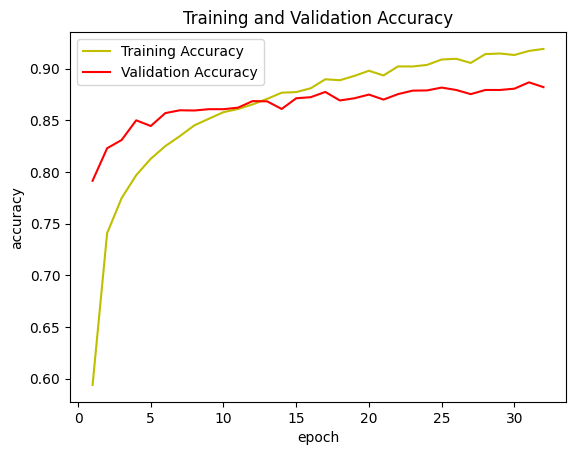

In [15]:
loss = result.history['accuracy']
val_loss = result.history['val_accuracy']
epochs = range(1,len(loss)+1)

import matplotlib.pyplot as plt
plt.plot(epochs,loss,'y',label='Training Accuracy')
plt.plot(epochs,val_loss,'r',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Model Evaluation

In [16]:
x=np.concatenate([val_generator.next()[0] for i in range(val_generator.__len__())])
y=np.concatenate([val_generator.next()[1] for i in range(val_generator.__len__())])
print(x.shape)
print(y.shape)

(4764, 128, 128, 3)
(4764, 50)


In [17]:
predict_x=model.predict(x,batch_size=32) 
classes_x=np.argmax(predict_x,axis=1)
y=np.argmax(y,axis=1)

149/149 [==============================] - 66s 436ms/step


In [18]:
print(classification_report(y,classes_x))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       100
           1       0.90      0.83      0.86       100
           2       0.70      0.84      0.76       100
           3       0.93      0.96      0.95       101
           4       0.88      0.82      0.85       100
           5       0.96      0.94      0.95       100
           6       0.95      0.95      0.95       101
           7       0.90      0.96      0.93       102
           8       0.92      0.86      0.89       100
           9       0.95      0.80      0.87       100
          10       0.72      0.97      0.83       100
          11       0.87      0.81      0.84       100
          12       0.90      0.95      0.92       100
          13       0.88      0.86      0.87       100
          14       0.91      0.91      0.91        68
          15       0.86      0.88      0.87       100
          16       0.97      0.99      0.98       100
          17       0.71    

In [19]:
from sklearn.metrics import accuracy_score, precision_score

In [20]:
print(accuracy_score(y, classes_x))
print(precision_score(y, classes_x, average='weighted')) #average='macro doesn't take label imbalance into account

0.8822418136020151
0.8880811092985346


In [21]:
class_name = train_generator.class_indices
class_name = list(dict.keys(class_name))
#print(class_name)

In [ ]:
#class_name = [name for name in os.listdir(train_dir)]
#class_name

In [26]:
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = load_img(path, target_size=(128, 128))
  x = img_to_array(img)
  x = preprocess_input(x)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  prediction = model.predict(images, batch_size=10)
  class_prediction = np.argmax(prediction, axis=1)[0]
  print(fn, "is predicted as", class_name[class_prediction])

Saving gettyimages-923543988_JPEG.rf.71aeee2d81e178da45ff3abdc4b61304.jpg to gettyimages-923543988_JPEG.rf.71aeee2d81e178da45ff3abdc4b61304.jpg
Saving sushi-reis-kochen-rezept-1-940x330_JPEG.rf.38488aad6be5b69f7b834dddf33a92d8.jpg to sushi-reis-kochen-rezept-1-940x330_JPEG.rf.38488aad6be5b69f7b834dddf33a92d8.jpg
Saving titelbild-wordpress-9_JPEG.rf.f0eb82a063c3a9411bf1ef28a2500228.jpg to titelbild-wordpress-9_JPEG.rf.f0eb82a063c3a9411bf1ef28a2500228.jpg
1/1 [==============================] - 0s 44ms/step
gettyimages-923543988_JPEG.rf.71aeee2d81e178da45ff3abdc4b61304.jpg is predicted as Nasi putih
1/1 [==============================] - 0s 40ms/step
sushi-reis-kochen-rezept-1-940x330_JPEG.rf.38488aad6be5b69f7b834dddf33a92d8.jpg is predicted as Nasi putih
1/1 [==============================] - 0s 42ms/step
titelbild-wordpress-9_JPEG.rf.f0eb82a063c3a9411bf1ef28a2500228.jpg is predicted as Kentang


In [36]:
print("Ini cuma biar runtime ga ke disconnect aja")
print("/tmp/1")

Ini cuma biar runtime ga ke disconnect aja
/tmp/1


In [32]:
# Fetch the Keras session and save the model
# The signature definition is defined by the input and output tensors,
# and stored with the default serving key
import os
import tempfile

MODEL_DIR = tempfile.gettempdir()
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format='h5',
    signatures=None,
    options=None
)

print('\nSaved model:')
!ls -l {export_path}

export_path = /tmp/1


Saved model:
-rw-r--r-- 1 root root 135493680 Jun 10 10:03 /tmp/1


In [ ]:
import os
import pandas as pd
def class_distribution_count(directory):
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])
df = class_distribution_count(train_dir)
df

,Class,No. of Image
0,Pokcoy,357
1,Tempe,351
2,Singkong,329
3,Apel,350
4,Kembang Kol,350
5,Tauge,296
6,Terong,350
7,Mentimun,350
8,Kacang tanah,350
9,Pepaya,350


Good accuracy but wrong prediction -> might be because imbalanced dataset https://stackoverflow.com/questions/58474361/good-accuracy-but-wrong-prediction